<a href="https://colab.research.google.com/github/oytungunes/PythonCodeExamples/blob/main/cnnlstm_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import imblearn



import keras
from keras.utils import np_utils
from sklearn.model_selection import KFold, StratifiedKFold

from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
#


import scipy.io
import numpy as np

mat = scipy.io.loadmat('/content/drive/MyDrive/newwdata/normalizedspectrogramforpython5and9.mat')

In [ ]:
#load data

X = mat['normalizedspectrogram'] #2 x 1178 x 141 , numoffeatures x timelength x sample
Y = mat['YTrain'] # numofsample x 1 0s and 1s
X = X.reshape(X.shape[2],X.shape[1],X.shape[0])# 170 4225 13
print(X.shape)# 116x150x153

(116, 150, 153)


In [ ]:
#%%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.11, random_state=1)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=1)



In [ ]:
#%%
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from keras.models import load_model



model = Sequential()

model.add(Conv1D(filters=4, kernel_size=5, padding='same', activation='relu',input_shape=(150,153)))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=4, kernel_size=5, padding='same', activation='relu',input_shape=(150,153)))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'acc' ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 150, 4)            3064      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 37, 4)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 4)             84        
                                                                 
 lstm (LSTM)                 (None, 32)                4736      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 7,917
Trainable params: 7,917
Non-trainable params: 0
______________________________________________________

Epoch 1/100
3/3 [==============================] - 4s 361ms/step - loss: 0.6926 - acc: 0.5543 - val_loss: 0.6896 - val_acc: 0.5455
Epoch 2/100
3/3 [==============================] - 0s 56ms/step - loss: 0.6881 - acc: 0.5109 - val_loss: 0.6902 - val_acc: 0.5455
Epoch 3/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6872 - acc: 0.5109 - val_loss: 0.6908 - val_acc: 0.5455
Epoch 4/100
3/3 [==============================] - 0s 56ms/step - loss: 0.6860 - acc: 0.5109 - val_loss: 0.6912 - val_acc: 0.6364
Epoch 5/100
3/3 [==============================] - 0s 55ms/step - loss: 0.6845 - acc: 0.5870 - val_loss: 0.6907 - val_acc: 0.5455
Epoch 6/100
3/3 [==============================] - 0s 52ms/step - loss: 0.6825 - acc: 0.5870 - val_loss: 0.6909 - val_acc: 0.5455
Epoch 7/100
3/3 [==============================] - 0s 52ms/step - loss: 0.6796 - acc: 0.5761 - val_loss: 0.6898 - val_acc: 0.5455
Epoch 8/100
3/3 [==============================] - 0s 67ms/step - loss: 0.6777 - acc: 0.5

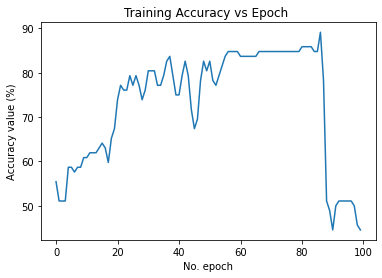

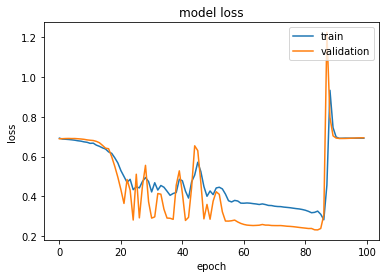

In [ ]:





#numberOfHiddenUnits =15 # calisan 8
#model = Sequential()
#model.add(LSTM(numberOfHiddenUnits))
#model.add(Dense(2, activation='sigmoid'))
#optimizer = keras.optimizers.Adam(lr=0.01)
#model.compile(loss="categorical_crosse#ntropy", optimizer=optimizer, metrics=['acc'])
#model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['acc'])




mycallbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50,verbose=1),
    
      keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
]

history= model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=32,epochs=100,callbacks =[mycallbacks],verbose=1)



#%%

import matplotlib.pyplot as plt

myacc = history.history['acc']
trainingaccuracy= myacc[-1]
accuracy = [x * 100 for x in myacc]

plt.figure(2)
plt.plot(accuracy)
plt.title('Training Accuracy vs Epoch ')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()



# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:

model= keras.models.load_model('best_model.h5')

trainloss, train_acc = model.evaluate(X_train, y_train)
valloss, val_acc = model.evaluate(X_val, y_val)

testloss,test_acc = model.evaluate(X_test,y_test)

print("Train Accuracy",train_acc)
print("Val Accuracy",val_acc)
print("Test Accuracy",test_acc)


1/1 [==============================] - 0s 38ms/step - loss: 0.4482 - acc: 0.7692
Train Accuracy 0.8369565010070801
Val Accuracy 0.9090909361839294
Test Accuracy 0.7692307829856873
